# Training regression models for unhealthy whole blood using 56/100 CpG sites

- This workbook trains the linear, lasso and ridge regression models for the Alzheimer's and Parkinson's cohorts using the 56/100 shared CpG sites from the HC blood XGBoost list
- Data used was created in the whole_blood_applying_hc_models.ipynb notebook and saved as alz_56_no_na.csv and park_56_no_na.csv


In [10]:
import _pickle as cPickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

### Reading in data

In [3]:
parkinsons_df=pd.read_csv('park_56_no_na.csv',index_col=0)  

In [4]:
alzheimers_df=pd.read_csv('alz_56_no_na.csv',index_col=0)  

### Defining the models

In [26]:
def lassoCV_regress(X_train,  X_test, y_train,y_test, plot=True, xmin=50,xmax=100,alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5):

    #Build fit model
    mod = mod = LassoCV(alphas=alphas,cv=cv)
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Lasso Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Lasso Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

In [27]:
def linear_regress(X_train,  X_test, y_train, y_test, plot=True,xmin=50,xmax=100):
    
    #Build fit model
    mod = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs='None')
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = sqrt(mean_squared_error(y_train, preds_train))
    rms_test = sqrt(mean_squared_error(y_test, preds_test))
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot progress over epochs and final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(25,6))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Linear Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Linear Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

In [28]:
def ridge_regress(X_train,  X_test, y_train,y_test, plot=True, xmin=50,xmax=100,alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5):

    #Build fit model
    mod = Ridge()
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Lasso Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Lasso Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

## Alzheimer's

### Test-train split

In [29]:
X_alz = alzheimers_df.iloc[:, 1:].to_numpy()
y_alz = alzheimers_df[['AGE']].astype(float).astype(int)
X_train_alz, X_test_alz, Y_train_alz, Y_test_alz = train_test_split(X_alz, y_alz, test_size=0.3, random_state = 4, shuffle=True)

### Linear 

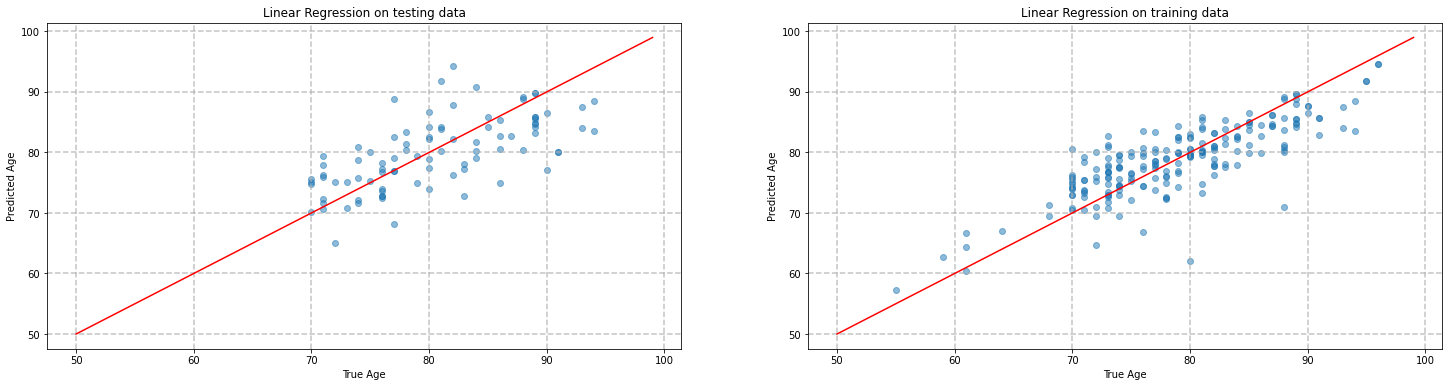

The rms on the training data is 4.234 years
The rms on the testing data is 5.330 years
The r^2 on the training data is 0.662
The r^2 on the testing data is 0.367


(LinearRegression(n_jobs='None'),
 4.23407612833167,
 5.329900983469207,
 0.6616847578649988,
 0.3672146311200024)

In [30]:
linear_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz)

### Lasso 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


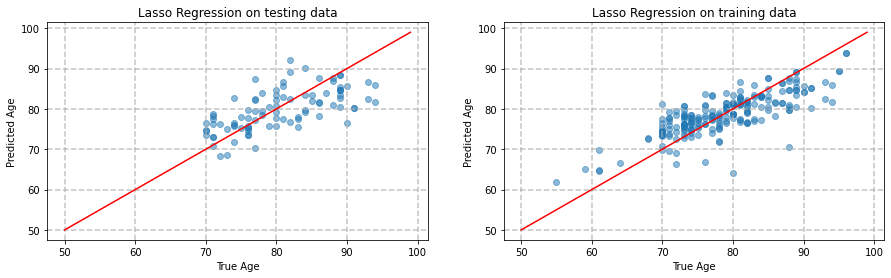

The rms on the training data is 4.534 years
The rms on the testing data is 5.214 years
The r^2 on the training data is 0.612
The r^2 on the testing data is 0.395


(LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                 10000.0, 100000.0],
         cv=5),
 4.534443294739195,
 5.213660815064149,
 0.6119817163430066,
 0.3945145731837979)

In [31]:
lassoCV_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz)

### Ridge

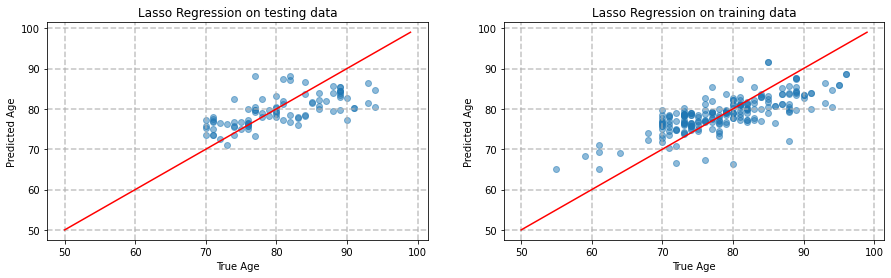

The rms on the training data is 4.969 years
The rms on the testing data is 5.140 years
The r^2 on the training data is 0.534
The r^2 on the testing data is 0.412


(Ridge(),
 4.9693675472173515,
 5.13950443478168,
 0.5339779362368222,
 0.4116162941385382)

In [32]:
ridge_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz)

## Parkinson's

### Test-train split

In [33]:
X_park = parkinsons_df.iloc[:, 1:].to_numpy()
y_park = parkinsons_df[['AGE']].astype(float).astype(int)
X_train_park, X_test_park, Y_train_park, Y_test_park = train_test_split(X_park, y_park, test_size=0.3, random_state = 4, shuffle=True)

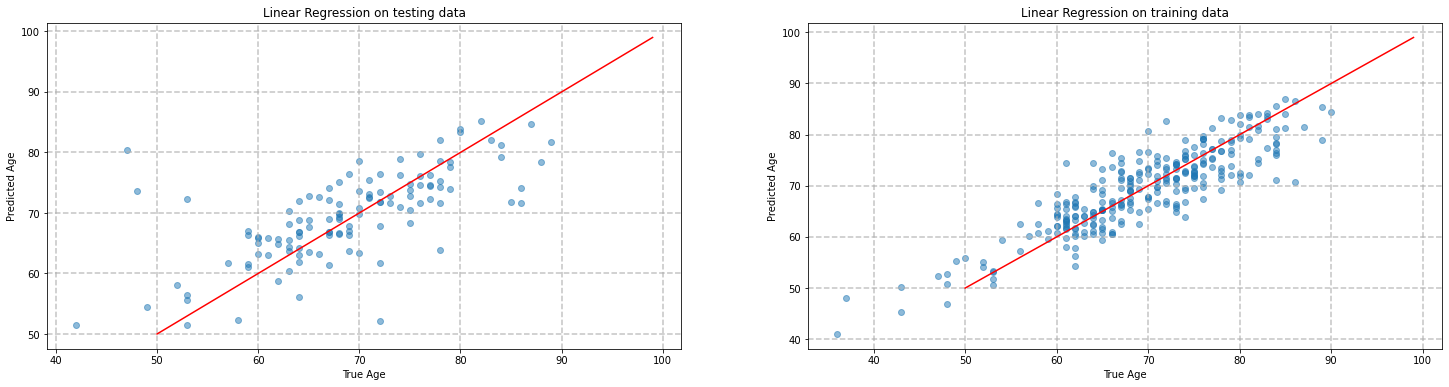

The rms on the training data is 4.429 years
The rms on the testing data is 6.638 years
The r^2 on the training data is 0.770
The r^2 on the testing data is 0.459


(LinearRegression(n_jobs='None'),
 4.428859246841385,
 6.638460200255814,
 0.76978988759535,
 0.45889380728828744)

In [34]:
linear_regress(X_train_park, X_test_park, Y_train_park, Y_test_park)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


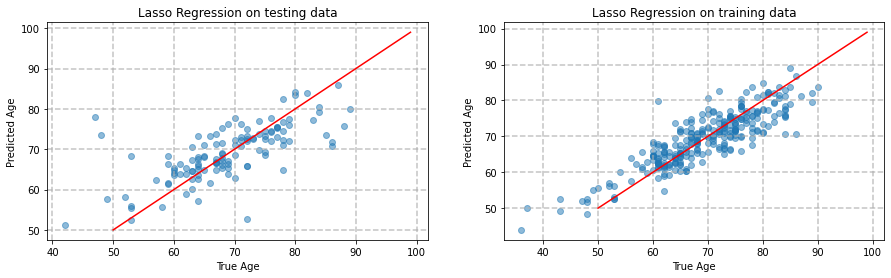

The rms on the training data is 4.648 years
The rms on the testing data is 6.486 years
The r^2 on the training data is 0.746
The r^2 on the testing data is 0.483


(LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                 10000.0, 100000.0],
         cv=5),
 4.648054877371994,
 6.4860021288021334,
 0.7464386039224005,
 0.4834623691215352)

In [35]:
lassoCV_regress(X_train_park, X_test_park, Y_train_park, Y_test_park)

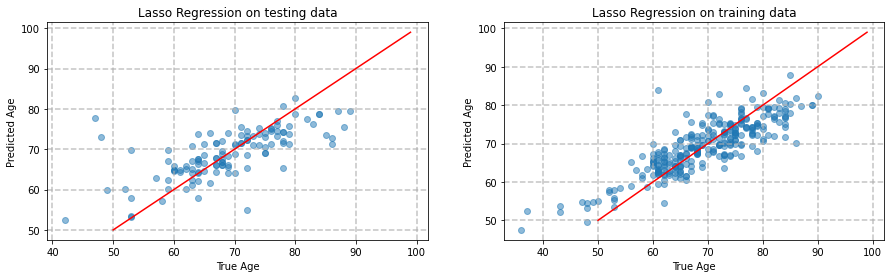

The rms on the training data is 5.014 years
The rms on the testing data is 6.515 years
The r^2 on the training data is 0.705
The r^2 on the testing data is 0.479


(Ridge(),
 5.013546702562842,
 6.5151450961818345,
 0.7049940535426051,
 0.4788101170386888)

In [36]:
ridge_regress(X_train_park, X_test_park, Y_train_park, Y_test_park)